# Saturn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import interpolate
from scipy.interpolate import interp1d
import seaborn as sns

### Lambert Scaling Function

In [2]:
# To convert to phase angle= 0 use the lambertian phase integral (PSG eqn 77) to simulate full disk view
def get_scale_factor_lambert(phase_angle): # phase angle in degrees
    scale_val= (1/np.pi)*(np.sin(np.deg2rad(phase_angle))+(np.pi-np.deg2rad(phase_angle))*np.cos(np.deg2rad(phase_angle)))
    return scale_val

### Read in all data sources

In [10]:
# karkoschka 1998 full disk albedo (updated values)
kark= np.genfromtxt('1995_karkoschka.txt')
# Clark and Mccord 1979, localized Albedo data
cmc_center= pd.read_csv('clark&mccord_fig4_center.csv')
cmc_limb= pd.read_csv('clark&mccord_fig5_limb_saturn.csv')
# Mallama 2017 photometric geo albedo values
mallama= np.genfromtxt('mallama_2017_geoalbedo_saturn.txt')
# Fink & Larson 1979 geometric albedo spectra from fig2b
finklarson= pd.read_csv('finklarson2b_fullline.csv')
# Irvine & lane 1971 geometric albedo disk of saturn
irvinelane= np.genfromtxt('irvinelane1971_table4.txt')
# clarke 1982 geo albedo
clarke= pd.read_csv('clarke1982_saturn.csv')
# Roberge et al. 2017 SpeX Data
roberge= pd.read_csv('Roberge2017_geometricalbedo_allplanets.csv')

## Reading in the Coulter et al. 2022 Data

In [11]:
cbf_6= np.genfromtxt('CBF_Figure6_Saturn.txt')

In [12]:
wavelength=[]
phase_39_albedo=[]
# phase_49_albedo=[]
# phase_57_albedo=[]
# phase_91_albedo=[]
# phase_110_albedo=[]
# phase_101_albedo=[]
for row in cbf_6:
    if row[0]<40:
        wavelength.append(row[1])
        phase_39_albedo.append(row[3])
    # if row[0]>49 and row[0]<50:
    #     phase_49_albedo.append(row[3])
    # if row[0]>57 and row[0]<58:
    #     phase_57_albedo.append(row[3])
    # if row[0]>91 and row[0]<92:
    #     phase_91_albedo.append(row[3])
    # if row[0]>110 and row[0]<111:
    #     phase_110_albedo.append(row[3])
    # if row[0]>101 and row[0]<102:
    #     phase_101_albedo.append(row[3])
cbf_39= np.column_stack((wavelength, phase_39_albedo))
# np.savetxt('cbf_pa_39deg_saturn.txt', cbf_39, delimiter=' ')
# cbf_49= np.column_stack((wavelength, phase_49_albedo))
# np.savetxt('cbf_pa_49deg_saturn.txt', cbf_49, delimiter=' ')
# cbf_57= np.column_stack((wavelength, phase_57_albedo))
# np.savetxt('cbf_pa_57deg_saturn.txt', cbf_57, delimiter=' ')
# cbf_91= np.column_stack((wavelength, phase_91_albedo))
# np.savetxt('cbf_pa_91deg_saturn.txt', cbf_91, delimiter=' ')
# cbf_110= np.column_stack((wavelength, phase_110_albedo))
# np.savetxt('cbf_pa_110deg_saturn.txt', cbf_110, delimiter=' ')
# cbf_101= np.column_stack((wavelength, phase_101_albedo))
# np.savetxt('cbf_pa_101deg_saturn.txt', cbf_101, delimiter=' ')

#### Reading in the color blind friendly color palette

In [13]:
cb_palette= sns.color_palette("colorblind")

In [14]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

# The Tri Plot

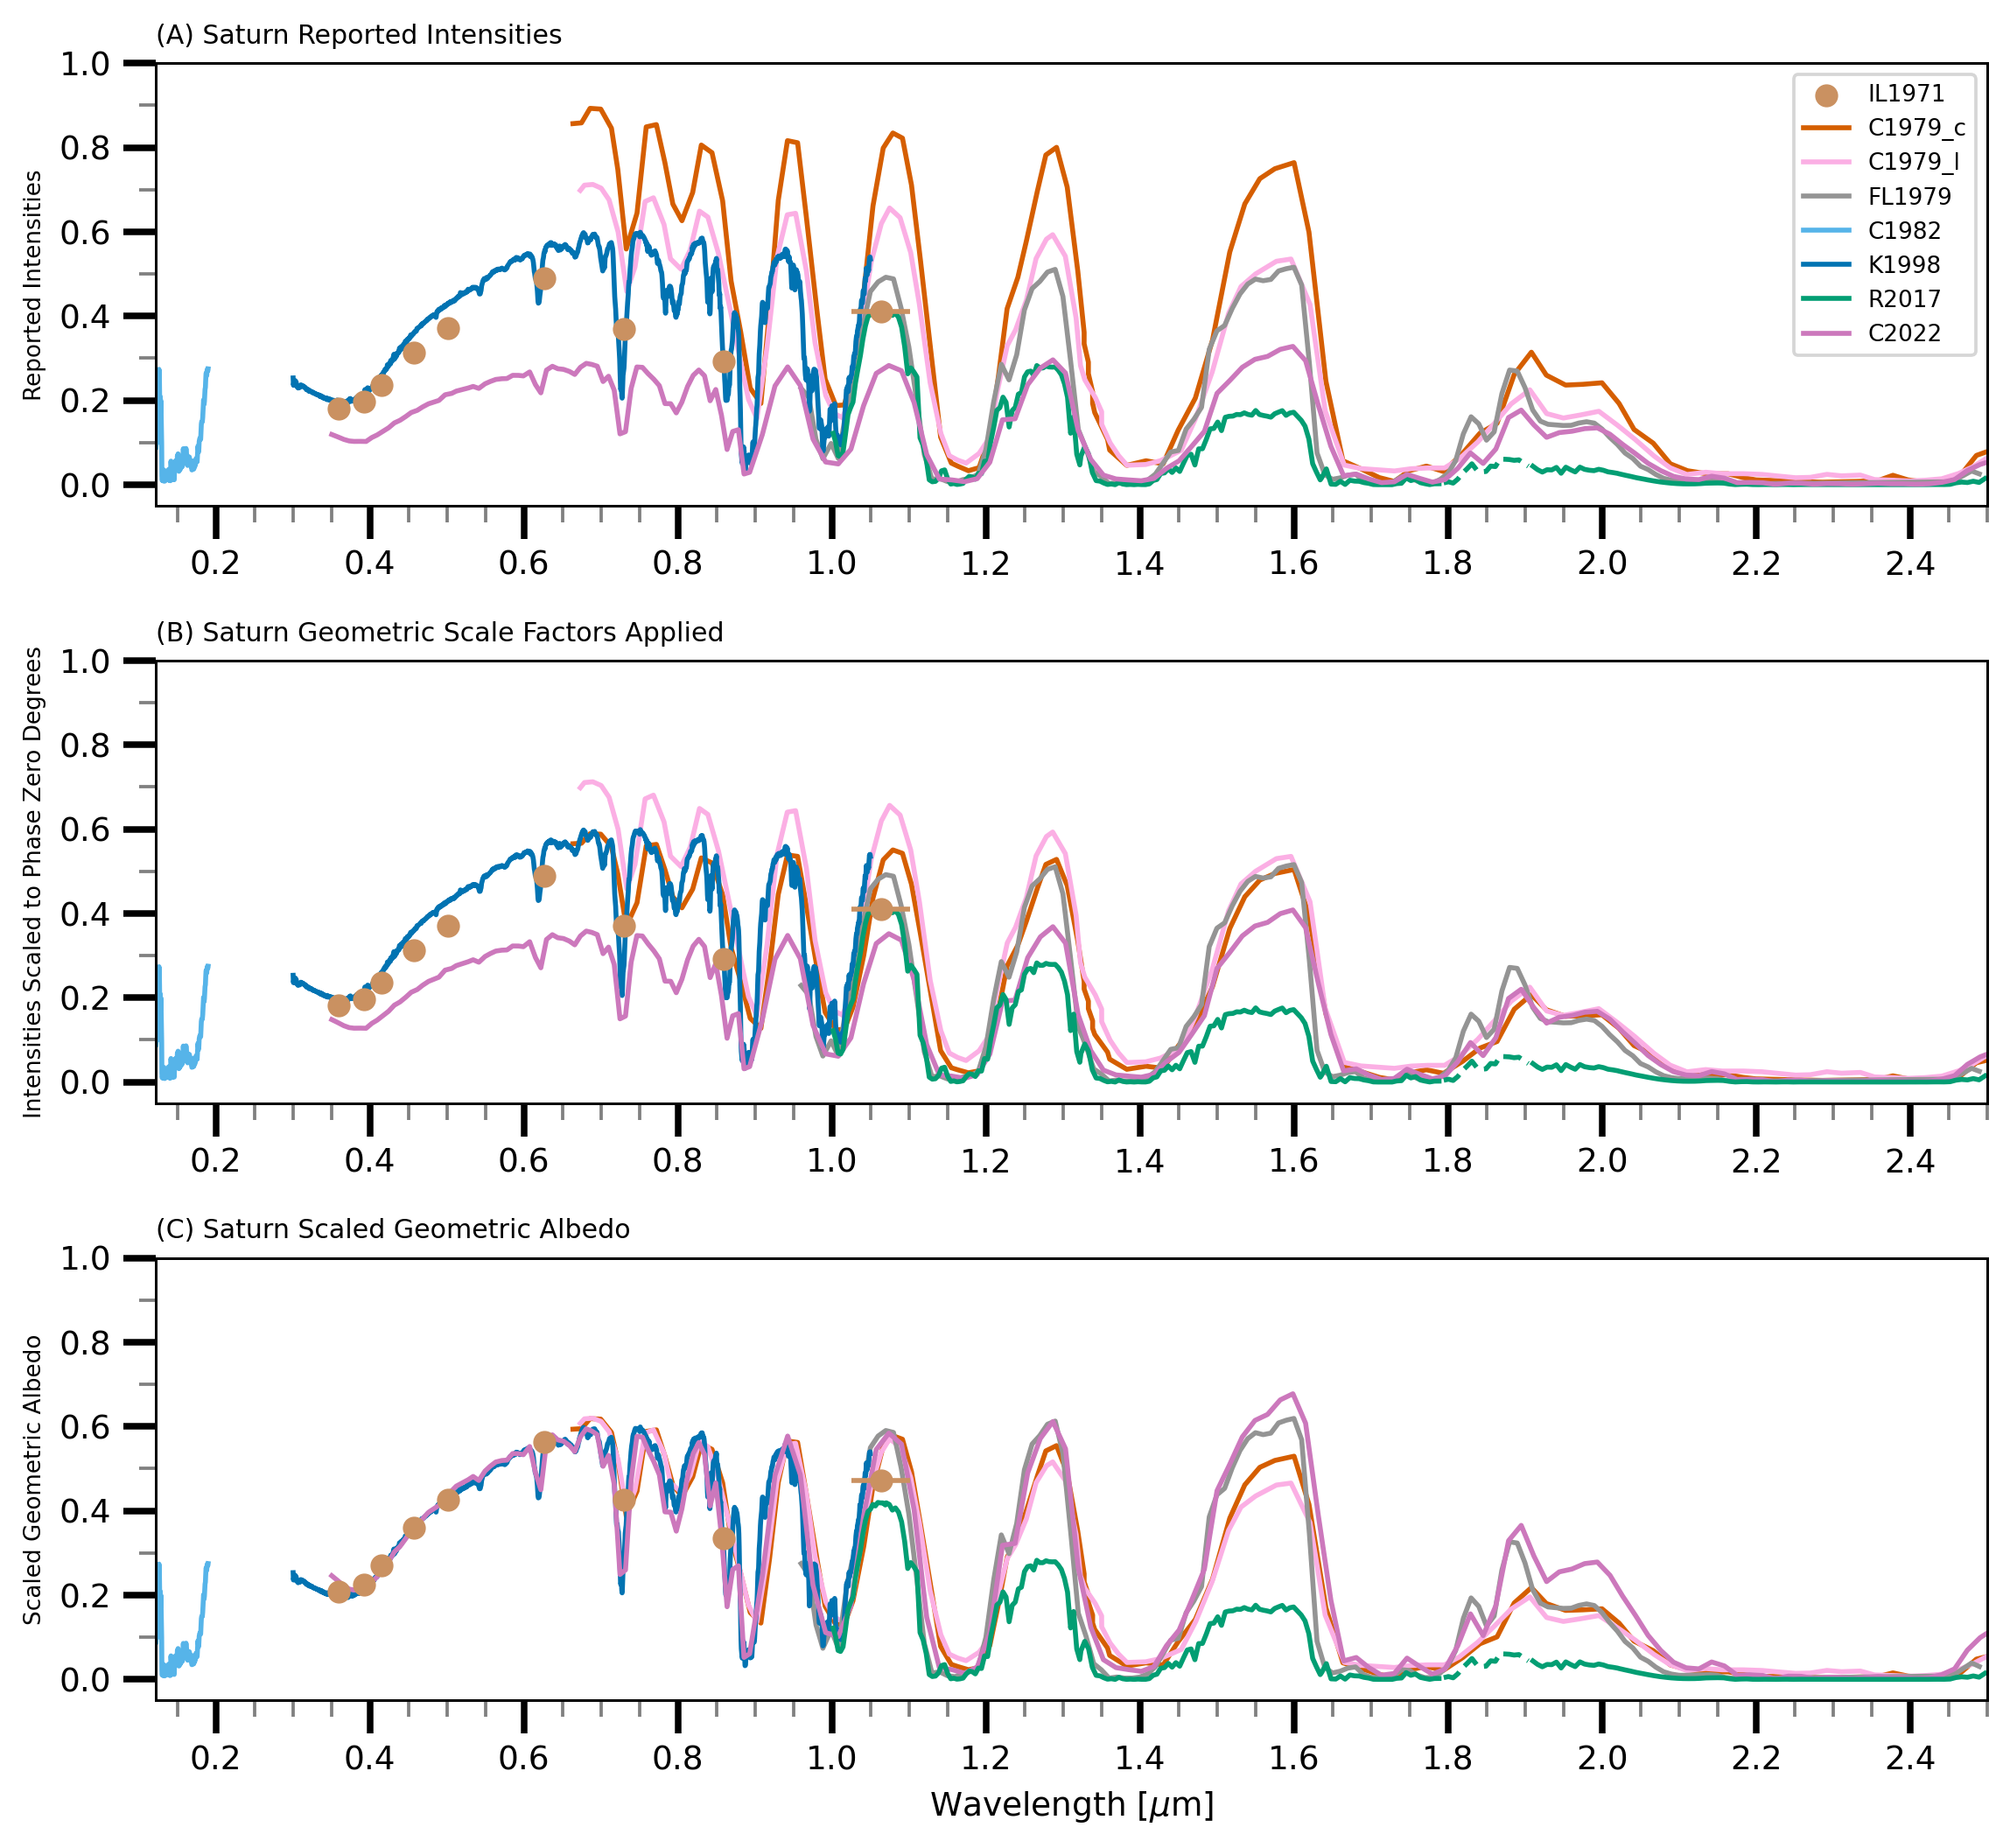

In [32]:
# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 9), dpi=270)
plt.subplots_adjust(hspace=0.35)

# DATA 
# FIGURE 1- ORIGINAL DATA
axes[0].scatter(irvinelane[:,0],irvinelane[:,1], color=cb_palette[5], label='IL1971', zorder=3)
axes[0].errorbar(irvinelane[:,0], irvinelane[:,1], xerr=irvinelane[:,2]/2, linestyle='none', color=cb_palette[5], zorder=3)
axes[0].plot(cmc_center['x'],cmc_center['y'], label='C1979_c', color=cb_palette[3])
axes[0].plot(cmc_limb['x'],cmc_limb['y'], label='C1979_l', color=cb_palette[6])
axes[0].plot(finklarson['x'],finklarson['y'], label='FL1979', color=cb_palette[7])
axes[0].plot(clarke['x'],clarke['y'], label='C1982', color=cb_palette[9])
axes[0].plot(kark[:,0]/1000,kark[:,4], label='K1998', color=cb_palette[0])
axes[0].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>=1) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Saturn'], color=cb_palette[2], label='R2017')
axes[0].plot(roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Saturn'], color=cb_palette[2],linestyle='--')
axes[0].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1.91)]['Wavelength [$\\mu$m]'], roberge[roberge['Wavelength [$\\mu$m]']>=1.91]['Saturn'], color=cb_palette[2])


#axes[0].plot(roberge[roberge['Wavelength [$\\mu$m]']>1]['Wavelength [$\\mu$m]'],roberge[roberge['Wavelength [$\\mu$m]']>1]['Saturn'], label='R2017', color=cb_palette[2])
axes[0].plot(cbf_39[:,0],cbf_39[:,1], label='C2022', color=cb_palette[4])

# # FIGURE 2- GEOMETRIC SCALING FACTORS APPLIED
axes[1].scatter(irvinelane[:,0],irvinelane[:,1], color=cb_palette[5], label='IL1971', zorder=3)
axes[1].errorbar(irvinelane[:,0], irvinelane[:,1], xerr=irvinelane[:,2]/2, linestyle='none', color=cb_palette[5], zorder=3)
axes[1].plot(cmc_center['x'],cmc_center['y']*0.66, label='C1979_c', color=cb_palette[3])
axes[1].plot(cmc_limb['x'],cmc_limb['y'], label='C1979_l', color=cb_palette[6])
axes[1].plot(finklarson['x'],finklarson['y'], label='FL1979', color=cb_palette[7])
axes[1].plot(clarke['x'],clarke['y'], label='C1982', color=cb_palette[9])
axes[1].plot(kark[:,0]/1000,kark[:,4], label='K1998', color=cb_palette[0])
# axes[1].scatter(mallama[:,0],mallama[:,1], label='M2017', color=cb_palette[6], zorder=2)
# axes[1].errorbar(mallama[:,0], mallama[:,1], xerr=mallama[:,2]/2, linestyle='none', color=cb_palette[6])
axes[1].plot(cbf_39[:,0],cbf_39[:,1]/get_scale_factor_lambert(39.64), label='C2022', color=cb_palette[4])
axes[1].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>=1) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Saturn'], color=cb_palette[2], label='R2017')
axes[1].plot(roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Saturn'], color=cb_palette[2],linestyle='--')
axes[1].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1.91)]['Wavelength [$\\mu$m]'], roberge[roberge['Wavelength [$\\mu$m]']>=1.91]['Saturn'], color=cb_palette[2])

# # FIGURE 3- EMPIRICAL SCALING FACTORS
axes[2].scatter(irvinelane[:,0],irvinelane[:,1]*1.15, color=cb_palette[5], label='IL1971', zorder=3)
axes[2].errorbar(irvinelane[:,0], irvinelane[:,1]*1.15, xerr=irvinelane[:,2]/2, linestyle='none', color=cb_palette[5], zorder=3)
axes[2].plot(cmc_center['x'],cmc_center['y']*0.66*1.05, label='C1979_c', color=cb_palette[3])
axes[2].plot(cmc_limb['x'],cmc_limb['y']*0.87, label='C1979_l', color=cb_palette[6])
axes[2].plot(finklarson['x'],finklarson['y']*1.2, label='FL1979', color=cb_palette[7])
axes[2].plot(clarke['x'],clarke['y'], label='C1982', color=cb_palette[9])
axes[2].plot(kark[:,0]/1000,kark[:,4], label='K1998', color=cb_palette[0])
# axes[2].scatter(mallama[:,0],mallama[:,1], label='M2017', color=cb_palette[6], zorder=2)
# axes[2].errorbar(mallama[:,0], mallama[:,1], xerr=mallama[:,2]/2, linestyle='none', color=cb_palette[6])
axes[2].plot(cbf_39[:,0],(cbf_39[:,1]/get_scale_factor_lambert(39.64))*1.66, label='C2022', color=cb_palette[4])
axes[2].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>=1) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Saturn'], color=cb_palette[2], label='R2017')
axes[2].plot(roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Saturn'], color=cb_palette[2],linestyle='--')
axes[2].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1.91)]['Wavelength [$\\mu$m]'], roberge[roberge['Wavelength [$\\mu$m]']>=1.91]['Saturn'], color=cb_palette[2])

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~FORMAT~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for value in range(3):
    # Keeping the tick marks consistent across the plots
    axes[value].xaxis.set_major_locator(MultipleLocator(0.2))
    axes[value].xaxis.set_minor_locator(MultipleLocator(0.05))
    axes[value].yaxis.set_major_locator(MultipleLocator(0.2))
    axes[value].yaxis.set_minor_locator(MultipleLocator(0.1))
    # Customize the appearance of ticks
    axes[value].tick_params(axis='both', which='major', length=10, width=2, color='black')
    axes[value].tick_params(axis='both', which='minor', length=5, width=1, color='gray')
    axes[value].set_xlim(clarke['x'].min(),2.5)
    axes[value].set_ylim(-0.05,1)

axes[0].set_title('(A) Saturn Reported Intensities', fontsize=8, loc='left')
axes[1].set_title('(B) Saturn Geometric Scale Factors Applied', fontsize=8, loc='left')
axes[2].set_title('(C) Saturn Scaled Geometric Albedo', fontsize=8, loc='left')
axes[0].set_ylabel('Reported Intensities', fontsize=7)
axes[1].set_ylabel('Intensities Scaled to Phase Zero Degrees', fontsize=7)
axes[2].set_ylabel('Scaled Geometric Albedo', fontsize=7)
axes[2].set_xlabel('Wavelength [$\mu$m]')
axes[0].legend(fontsize=7, loc='upper right')
plt.savefig('final_plots/Saturn_triplot.png', bbox_inches='tight');

# Composite Spectrum
- shown for reference

In [20]:
x_values= (max(kark[:,0]/1000), min(finklarson[finklarson['x']>1.045]['x']))
y_values= (0.5355, 0.549949)
dashed_line= np.column_stack((x_values, y_values))

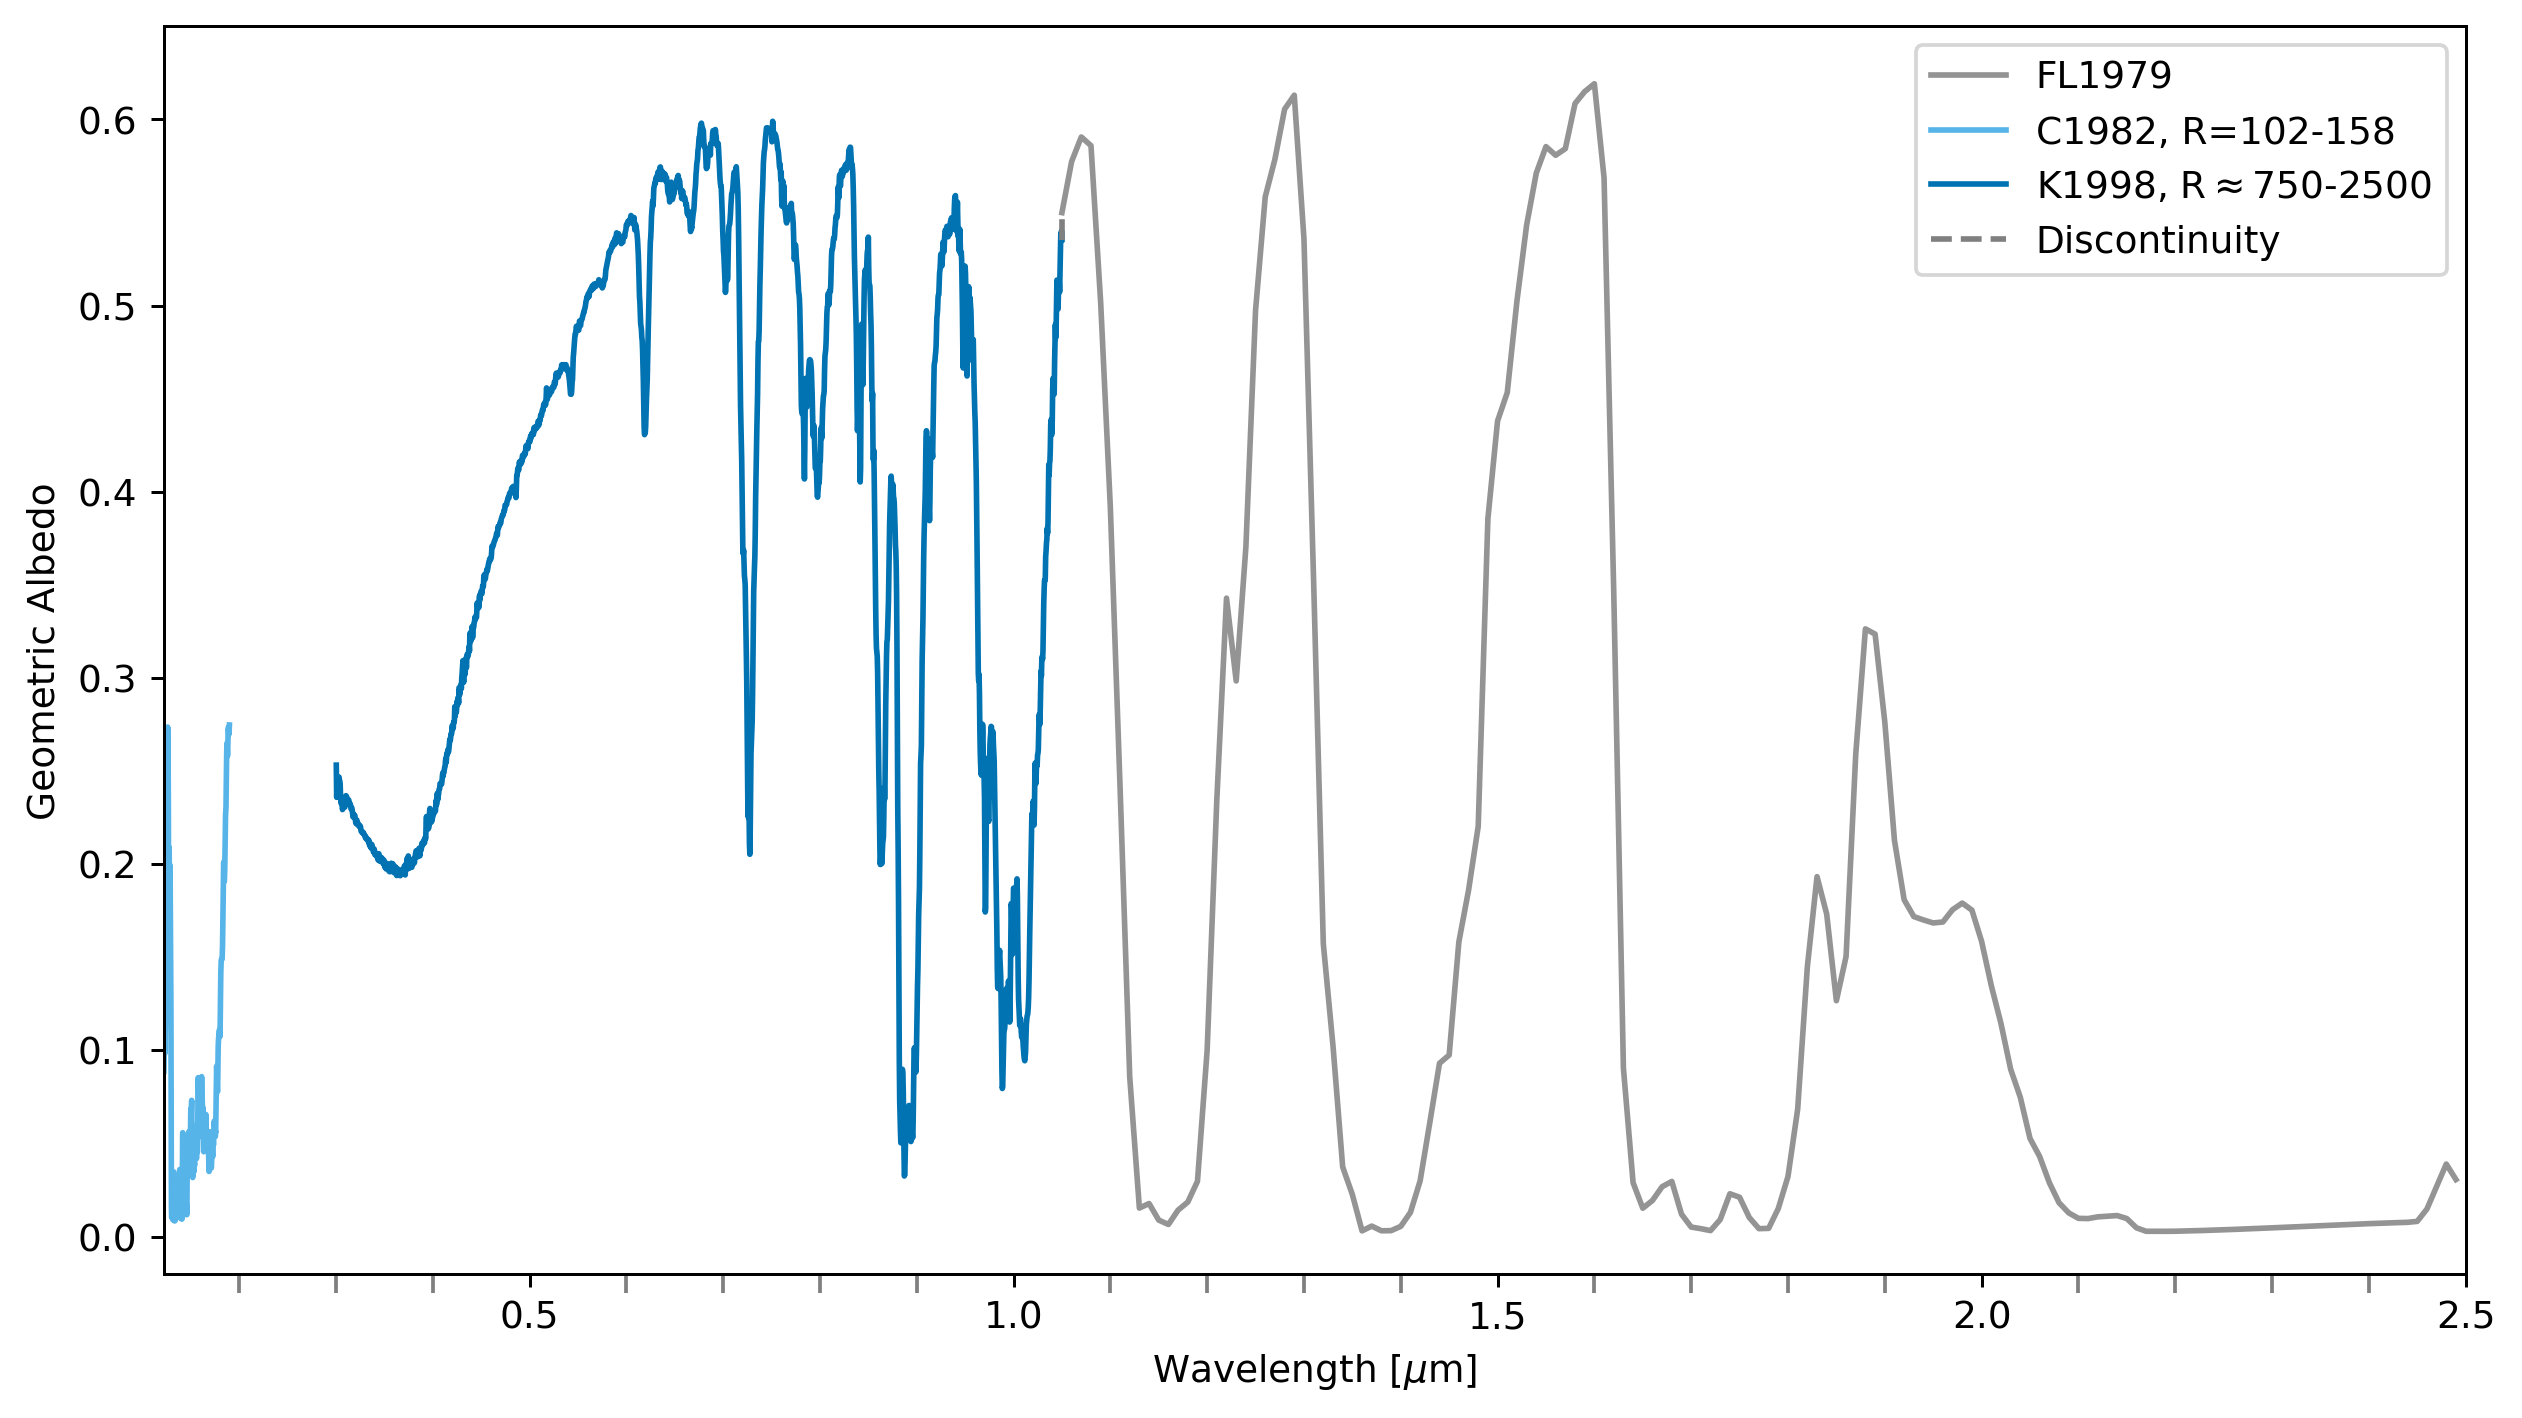

In [21]:
plt.figure(figsize=(11,6), dpi=270)

plt.plot(finklarson[finklarson['x']>1.045]['x'],finklarson[finklarson['x']>1.045]['y']*1.2, label='FL1979', color=cb_palette[7])
plt.plot(clarke['x'],clarke['y'], label='C1982, R=102-158', color=cb_palette[9])
plt.plot(kark[:,0]/1000,kark[:,4], label=r'K1998, R$\approx$750-2500', color=cb_palette[0])
plt.plot(dashed_line[:,0], dashed_line[:,1], label='Discontinuity', linestyle='dashed', zorder=2, color='grey')

plt.legend()
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.1))
plt.gca().tick_params(axis='both', which='minor', length=5, width=1, color='gray')
plt.ylim(-0.02,0.65)
plt.xlim(min(clarke['x']),2.5)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Geometric Albedo')
plt.savefig('final_plots/saturn_composite.png', bbox_inches="tight") ;

## Save Data

In [22]:
x_1= list(clarke['x'])
y_1= list(clarke['y'])
x_2= kark[:,0]/1000
y_2= kark[:,4]
x_3= finklarson[finklarson['x']>1.045]['x']
y_3=finklarson[finklarson['x']>1.045]['y']*1.2
x_new_list= np.concatenate((x_1, x_2, x_3))
y_new_list= np.concatenate((y_1, y_2, y_3))
composite_df= pd.DataFrame({'x_1': x_new_list, 'y_1': y_new_list})

#composite_df.to_csv('saturn_composite_data.csv', index=False)

In [23]:
composite_df.to_csv('composite_spectrum/saturn_composite_data.csv', index=False)
composite_df.to_csv('composite_spectrum/saturn_composite_data.txt', sep=' ', index=False)

# Why I chose to use FL1979 instead of C2022 to extend the spectrum into the IR
- They both show very similar features (as seen in plot below)
- The green (FL1979) shows slightly higher resolution features
- both align well with the karkoschka data near 1 micron but futher into the IR portion the C2022 (pink) data appears to begin to overpredict the geometric albedo values
    - this is due to the correct factor that was applied on the data
- The C2022 data was published at a phase angle of 39 degrees which is too high for an accurate analysis when scaled to phase zero in this work

## Comparison between Roberge et al. SpeX data and the FL1979 data set that is used

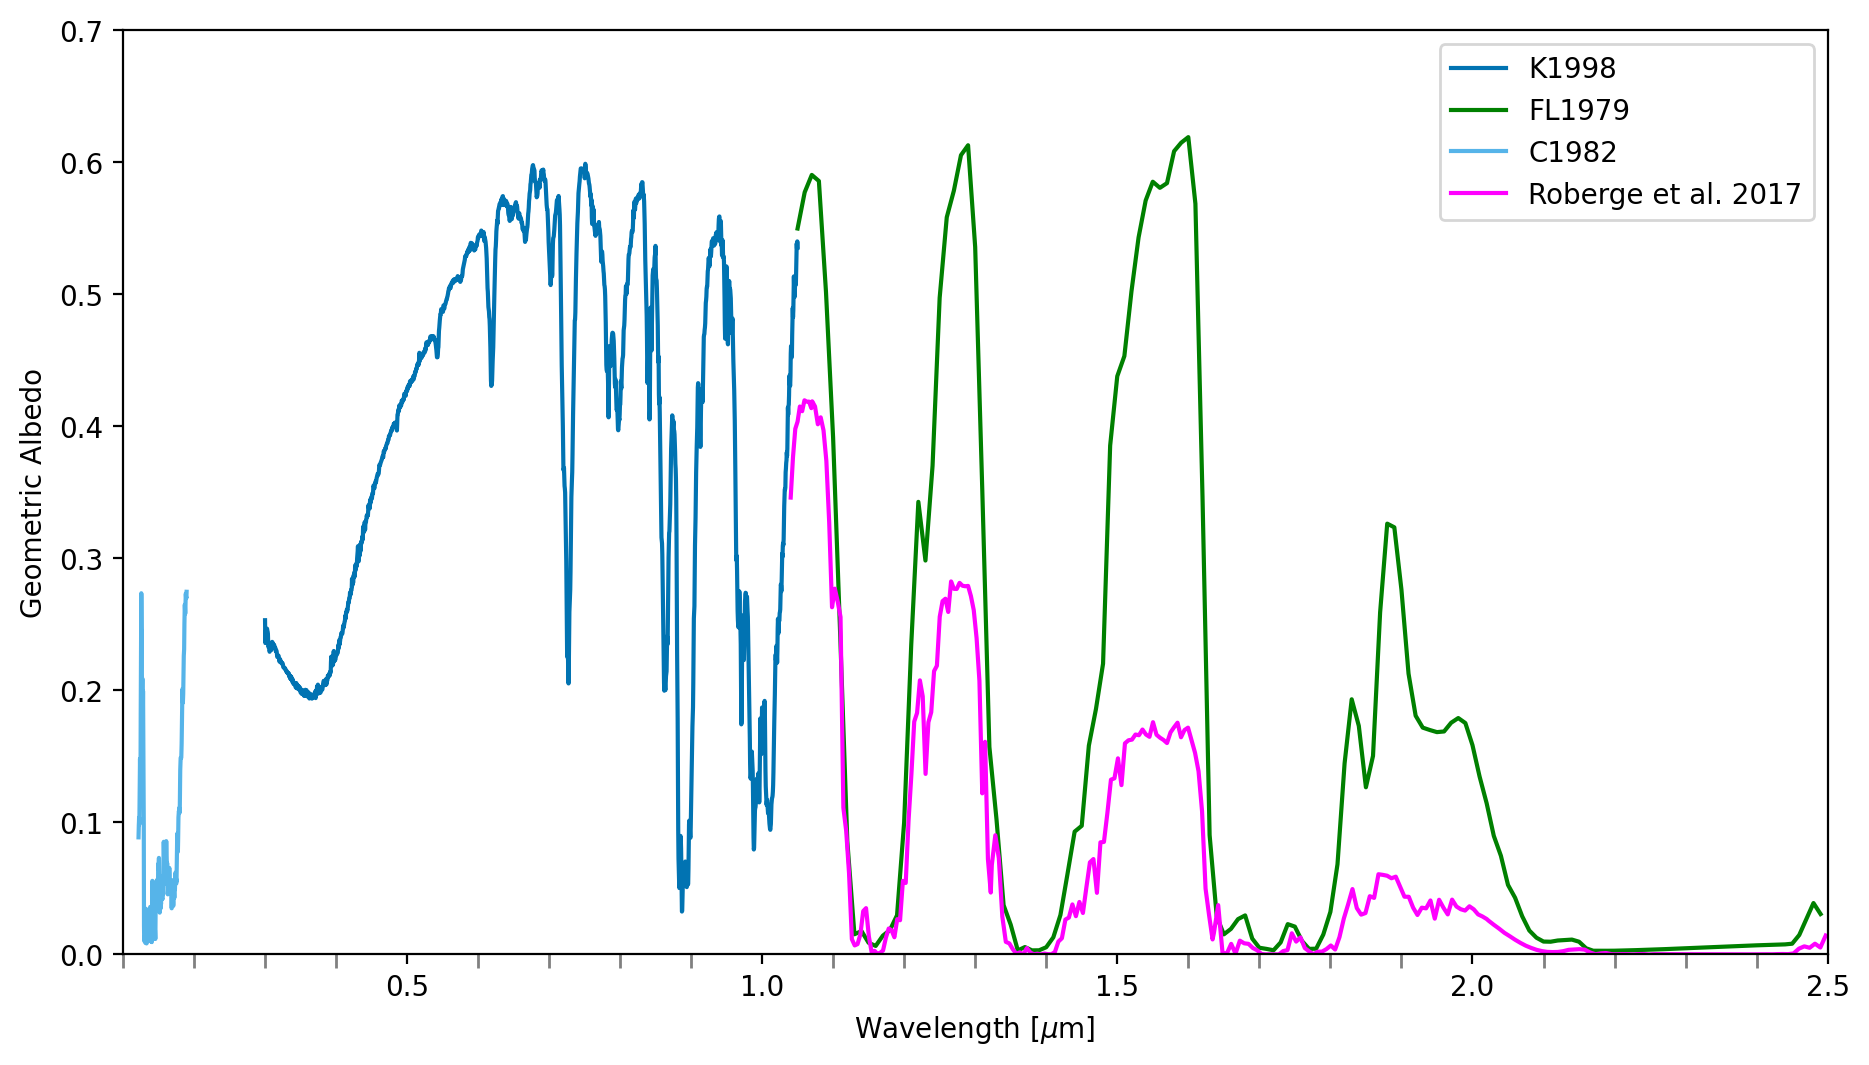

In [27]:
plt.figure(figsize=(11,6), dpi=200)
# plt.plot(cmc_center['x'],cmc_center['y']*0.66*1.05, label='C1979_c', color=cb_palette[3])
# plt.plot(cmc_limb['x'],cmc_limb['y']*0.87, label='C1979_l', color=cb_palette[6])

plt.plot(kark[:,0]/1000,kark[:,4], label='K1998', color=cb_palette[0])
plt.plot(finklarson[finklarson['x']>1.045]['x'],finklarson[finklarson['x']>1.045]['y']*1.2, label='FL1979', color='green')
plt.plot(clarke['x'],clarke['y'], label='C1982', color=cb_palette[9])
#plt.plot(cbf_39[cbf_39[:,0]>1.04][:,0],(cbf_39[cbf_39[:,0]>1.04][:,1]/get_scale_factor_lambert(39.64))*1.66, label='C2022', color=cb_palette[4])
plt.plot(roberge[roberge['Wavelength [$\\mu$m]']>1.04]['Wavelength [$\\mu$m]'], roberge[roberge['Wavelength [$\\mu$m]']>1.04]['Saturn'], label='Roberge et al. 2017', color='magenta')

plt.legend()
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.1))
plt.gca().tick_params(axis='both', which='minor', length=5, width=1, color='gray')
plt.ylim(0,0.7)
plt.xlim(0.1,2.5)
plt.ylabel('Geometric Albedo')
plt.xlabel('Wavelength [$\mu$m]')
plt.savefig('final_plots/roberge_composite.png')